In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
df = pd.read_csv("all_tweets_predicted_bert93.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df.head()
len(df)

58864

In [3]:
# Date Spalte erstellen
import datetime
stri = df["Timestamp"][0]
stri[:10]
date = []

for i in df["Timestamp"]:
    datum = i[:10]
    date.append(datum)

df["Date"] = date
df["Date"][0]


df['Date']= pd.to_datetime(df['Date'])

df["Sentiment"] = df["sentiment_prediction"]
df.loc[(df.Sentiment == 2),'Sentiment']='Neutral'
df.loc[(df.Sentiment == 1),'Sentiment']='Negative'
df.loc[(df.Sentiment == 0),'Sentiment']='Positive'

In [4]:
df["Sentiment_adjusted"] = df["sentiment_prediction"]
df.loc[(df.Sentiment == "Neutral"),'Sentiment_adjusted']=0
df.loc[(df.Sentiment == "Negative"),'Sentiment_adjusted']=-1
df.loc[(df.Sentiment == "Positive"),'Sentiment_adjusted']=1

mask = (df['Date'] < '2021-12-31')
df = df.loc[mask]
df.head()

,Unnamed: 0.1,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL,id,Partei,sentiment_prediction,Date,Sentiment,Sentiment_adjusted
0,0,AfD Berlin,@AfDBerlin,2021-03-26T21:07:22.000Z,AfD Berlin\n@AfDBerlin\n·\n26. März,AfD wirkt.\n\nSchluss mit dem #Gendergaga\nMDR...,NaN,4.0,28.0,132.0,['https://pbs.twimg.com/profile_images/1037343...,https://twitter.com/AfDBerlin/status/137555499...,1,AfD,2,2021-03-26,Neutral,0
1,1,AfD Berlin,@AfDBerlin,2021-03-27T07:20:27.000Z,AfD Berlin\n@AfDBerlin\n·\n27. März,Im Herbst wird gewählt.\nSchluss mit den Recht...,NaN,10.0,20.0,112.0,['https://pbs.twimg.com/card_img/1471780757332...,https://twitter.com/AfDBerlin/status/137570928...,2,AfD,2,2021-03-27,Neutral,0
2,2,AfD Berlin,@AfDBerlin,2021-03-31T07:14:04.000Z,AfD Berlin\n@AfDBerlin\n·\n31. März,Behördenwillkür\nFlüchtlingsheime durchgedrück...,NaN,3.0,13.0,34.0,['https://pbs.twimg.com/media/ExylKvEU8AgowSU?...,https://twitter.com/AfDBerlin/status/137715723...,3,AfD,1,2021-03-31,Negative,-1
3,3,AfD Berlin,@AfDBerlin,2021-04-01T14:29:00.000Z,AfD Berlin\n@AfDBerlin\n·\n1. Apr.,Aus Raider wird jetzt Twix \n\nLeider kein #Ap...,NaN,1.0,4.0,17.0,['https://pbs.twimg.com/card_img/1472910546907...,https://twitter.com/AfDBerlin/status/137762907...,4,AfD,2,2021-04-01,Neutral,0
4,4,AfD Berlin,@AfDBerlin,2021-04-01T05:02:10.000Z,AfD Berlin\n@AfDBerlin\n·\n1. Apr.,Gendern geht („*innen“)\nImpfen geht nicht.\nD...,NaN,1.0,3.0,16.0,['https://pbs.twimg.com/profile_images/9706413...,https://twitter.com/AfDBerlin/status/137748642...,5,AfD,1,2021-04-01,Negative,-1


In [5]:
afd = df[df["Partei"] == "AfD"]
cducsu = df[df["Partei"] == "CDU/CSU"]
linke = df[df["Partei"] == "DieLinke"]
fdp = df[df["Partei"] == "FDP"]
gruene = df[df["Partei"] == "Gruene"]
spd = df[df["Partei"] == "SPD"]

In [6]:
# group by party and look at sentiment distribution per party
afd_pos = afd[afd["sentiment_prediction"] == 0].UserName.count()
afd_neg = afd[afd["sentiment_prediction"] == 1].UserName.count()
afd_neutr = afd[afd["sentiment_prediction"] == 2].UserName.count()

# group by party and look at sentiment distribution per party
spd_pos = spd[spd["sentiment_prediction"] == 0].UserName.count()
spd_neg = spd[spd["sentiment_prediction"] == 1].UserName.count()
spd_neutr = spd[spd["sentiment_prediction"] == 2].UserName.count()

# group by party and look at sentiment distribution per party
linke_pos = linke[linke["sentiment_prediction"] == 0].UserName.count()
linke_neg = linke[linke["sentiment_prediction"] == 1].UserName.count()
linke_neutr = linke[linke["sentiment_prediction"] == 2].UserName.count()

# group by party and look at sentiment distribution per party
fdp_pos = fdp[fdp["sentiment_prediction"] == 0].UserName.count()
fdp_neg = fdp[fdp["sentiment_prediction"] == 1].UserName.count()
fdp_neutr = fdp[fdp["sentiment_prediction"] == 2].UserName.count()

# group by party and look at sentiment distribution per party
gruene_pos = gruene[gruene["sentiment_prediction"] == 0].UserName.count()
gruene_neg = gruene[gruene["sentiment_prediction"] == 1].UserName.count()
gruene_neutr = gruene[gruene["sentiment_prediction"] == 2].UserName.count()

# group by party and look at sentiment distribution per party
cducsu_pos = cducsu[cducsu["sentiment_prediction"] == 0].UserName.count()
cducsu_neg = cducsu[cducsu["sentiment_prediction"] == 1].UserName.count()
cducsu_neutr = cducsu[cducsu["sentiment_prediction"] == 2].UserName.count()

pos = df[df["sentiment_prediction"] == 0].UserName.count()
neg = df[df["sentiment_prediction"] == 1].UserName.count()
neutr = df[df["sentiment_prediction"] == 2].UserName.count()

Text(0.5, 1.0, 'Overall Sentiment Distribution')

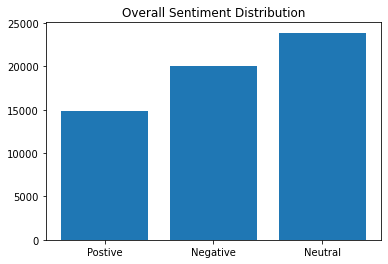

In [7]:
fig, ax = plt.subplots()
ax.bar(["Postive", "Negative", "Neutral"], [pos, neg, neutr])
plt.title("Overall Sentiment Distribution")

C:\Users\maxiw\anaconda3\envs\dh\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



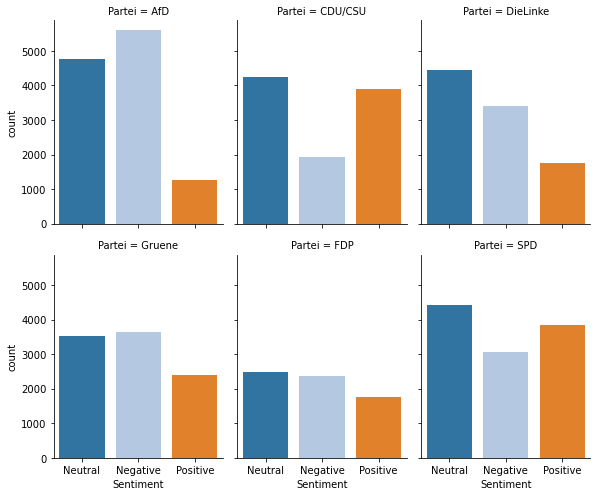

<Figure size 432x288 with 0 Axes>

In [9]:
# Plot
g = sns.catplot("Sentiment", col="Partei", col_wrap=3,
                data=df,
                kind="count", height=3.5, aspect=.8, 
                palette='tab20')

#fig.suptitle('sf')
plt.show()
plt.savefig('party_sentiment_distribution.png')

In [ ]:
# plot sentiment in general over time

In [ ]:
# plot sentiment per party over time/ Wahldatum

In [10]:
#pd.pivot_table(df.reset_index(),
#               index="Date", columns='Partei', values='sentiment_prediction'
#              ).plot(subplots=True, figsize=(15,30))

In [ ]:
# pro Partei und dann jeder Politiker

In [11]:
afd = afd.set_index('Date')

<AxesSubplot:xlabel='Date'>

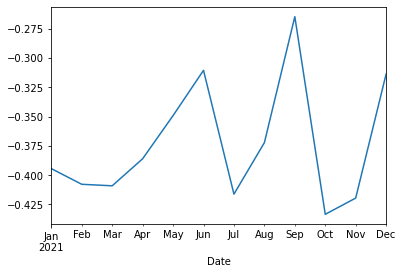

In [12]:
# resampled weekly
afd['Sentiment_adjusted'].resample('M').mean().plot()

In [8]:
colors = ["deepskyblue","black", "purple", "yellow", "green","red"]

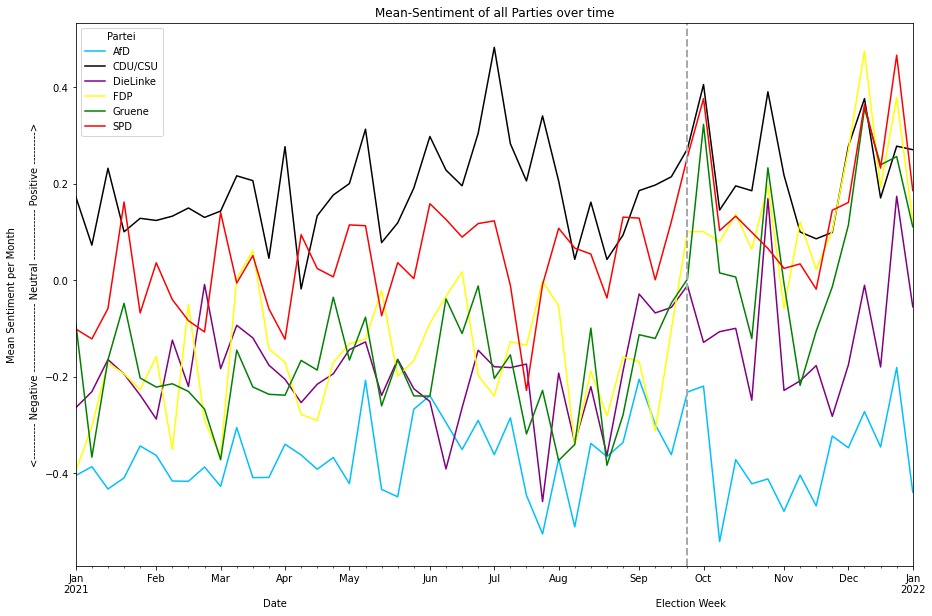

In [9]:
(df.pivot_table(index='Date', columns='Partei', values='Sentiment_adjusted')
   .resample('W').mean().plot(ylabel= r"Mean Sentiment per Month"
           "\n"                    
           "\n"  # Newline: the backslash is interpreted as usual
           r"<---------- Negative ------------------- Neutral -------------- Positive --------->",
                              color=colors, xlabel="Date                                                                                                                      Election Week"
                             ,title="Mean-Sentiment of all Parties over time",figsize=(15,10))).axvline(pd.to_datetime('2021-09-26'), color='darkgrey', linestyle='--', lw=2)

In [192]:
#(df.pivot_table(index='Date', columns='Partei', values='Sentiment_adjusted')
#   .resample('M').mean().plot(subplots=True,figsize=(15,20)))

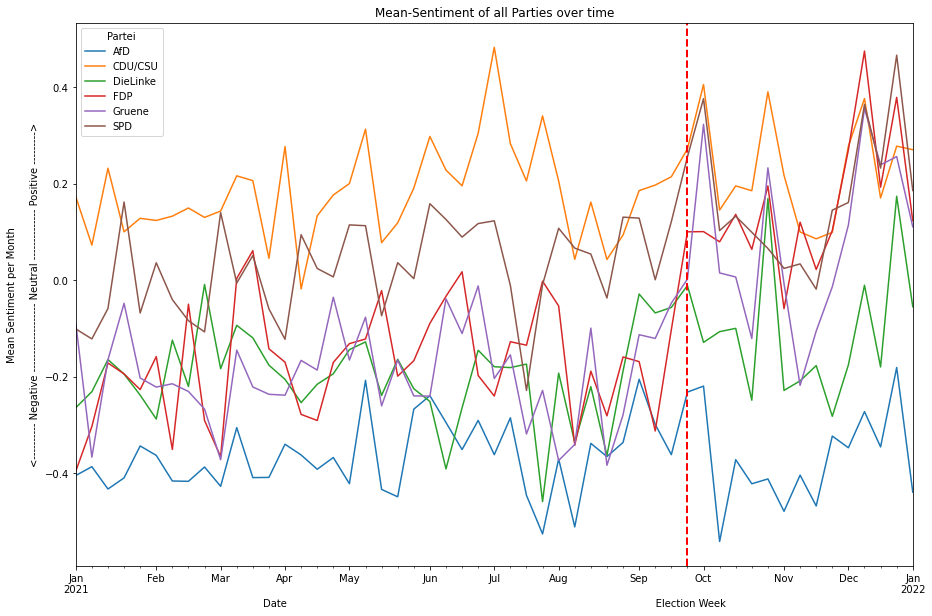

In [10]:
(df.pivot_table(index='Date', columns='Partei', values='Sentiment_adjusted')
   .resample('W').mean().plot(ylabel= r"Mean Sentiment per Month"
           "\n"                    
           "\n"  # Newline: the backslash is interpreted as usual
           r"<---------- Negative ------------------- Neutral -------------- Positive --------->", xlabel="Date                                                                                                                      Election Week"
                             ,title="Mean-Sentiment of all Parties over time",figsize=(15,10))).axvline(pd.to_datetime('2021-09-26'), color='r', linestyle='--', lw=2)

In [11]:
def f_2017(row):
    if row['Partei'] == "AfD":
        val = "Opposition"
    elif row['Partei'] == "DieLinke":
        val = "Opposition"
    elif row['Partei'] == "FDP":
        val = "Opposition"
    elif row['Partei'] == "Gruene":
        val = "Opposition"
    elif row['Partei'] == "CDU/CSU":
        val = "Government"
    elif row['Partei'] == "SPD":
        val = "Government"
    return val
        
def f_2021(row):
    if row['Partei'] == "AfD":
        val = "Opposition"
    elif row['Partei'] == "DieLinke":
        val = "Opposition"
    elif row['Partei'] == "CDU/CSU":
        val = "Opposition"
    elif row['Partei'] == "Gruene":
        val = "Government"
    elif row['Partei'] == "FDP":
        val = "Government"
    elif row['Partei'] == "SPD":
        val = "Government"
    return val

In [12]:
df['Regierungsstatus_2017'] = df.apply(f_2017, axis=1)
df['Regierungsstatus_2021'] = df.apply(f_2021, axis=1)

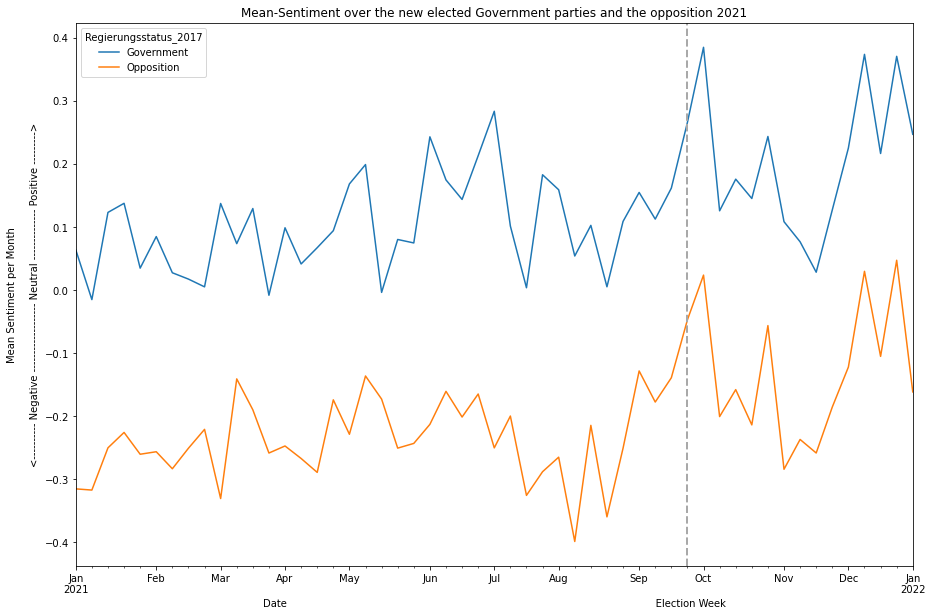

In [33]:
(df.pivot_table(index='Date', columns='Regierungsstatus_2017', values='Sentiment_adjusted')
   .resample('W').mean().plot(ylabel= r"Mean Sentiment per Month"
           "\n"                    
           "\n"  # Newline: the backslash is interpreted as usual
           r"<---------- Negative ------------------- Neutral -------------- Positive --------->", xlabel="Date                                                                                                                      Election Week",
                              title="Mean-Sentiment over the new elected Government parties and the opposition 2021",
                              figsize=(15,10))).axvline(pd.to_datetime('2021-09-26'), color='darkgrey', linestyle='--', lw=2)


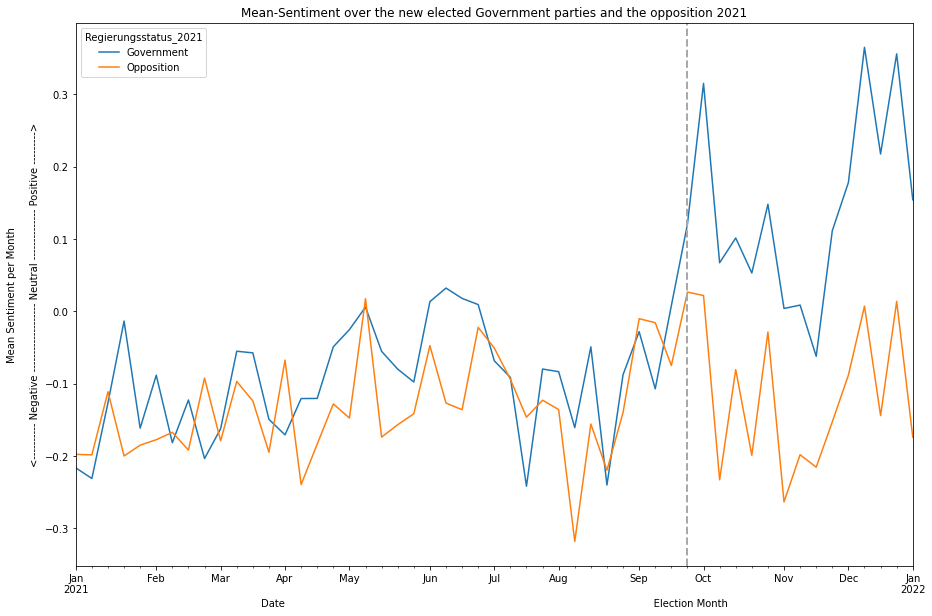

In [34]:
(df.pivot_table(index='Date', columns='Regierungsstatus_2021', values='Sentiment_adjusted')
   .resample('W').mean().plot(ylabel= r"Mean Sentiment per Month"
           "\n"                    
           "\n"  # Newline: the backslash is interpreted as usual
           r"<---------- Negative ------------------- Neutral -------------- Positive --------->", xlabel="Date                                                                                                                      Election Month",
                              title="Mean-Sentiment over the new elected Government parties and the opposition 2021",
                              figsize=(15,10))).axvline(pd.to_datetime('2021-09-26'), color='darkgrey', linestyle='--', lw=2)

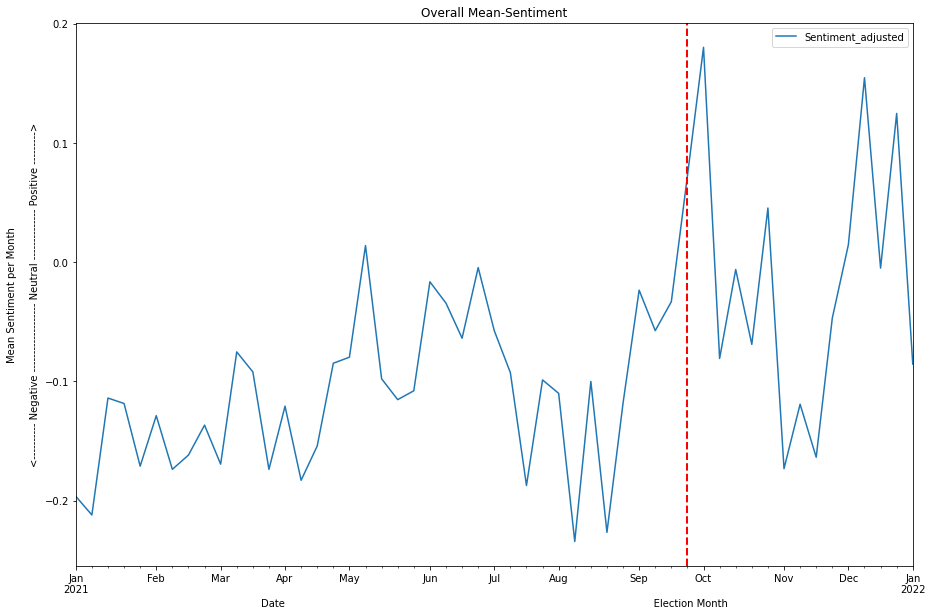

In [19]:
(df.pivot_table(index='Date', values='Sentiment_adjusted')
   .resample('W').mean().plot(ylabel= r"Mean Sentiment per Month"
           "\n"                    
           "\n"  # Newline: the backslash is interpreted as usual
           r"<---------- Negative ------------------- Neutral -------------- Positive --------->", xlabel="Date                                                                                                                      Election Month",
                              title="Overall Mean-Sentiment",
                              figsize=(15,10))).axvline(pd.to_datetime('2021-09-26'), color='r', linestyle='--', lw=2)

Text(0.5, 1.0, 'Sentiment distribution of the Government parties which got elected in 2021')

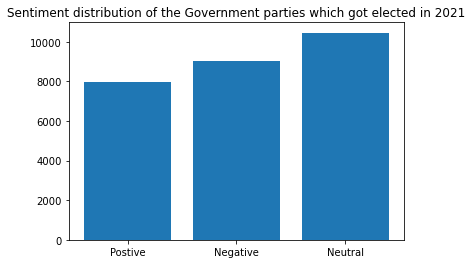

In [20]:
pos_gov = df[df["sentiment_prediction"] == 0]
pos_gov = pos_gov[pos_gov["Regierungsstatus_2021"] == "Government"].UserName.count()
neg_gov = df[df["sentiment_prediction"] == 1]
neg_gov = neg_gov[neg_gov["Regierungsstatus_2021"] == "Government"].UserName.count()
neutr_gov = df[df["sentiment_prediction"] == 2]
neutr_gov = neutr_gov[neutr_gov["Regierungsstatus_2021"] == "Government"].UserName.count()

fig, ax = plt.subplots()
ax.bar(["Postive", "Negative", "Neutral"], [pos_gov, neg_gov, neutr_gov])
plt.title("Sentiment distribution of the Government parties which got elected in 2021")

Text(0.5, 1.0, 'Sentiment distribution of the Opposition parties which got elected in 2021')

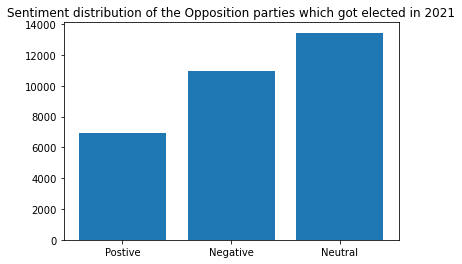

In [21]:
pos_opp = df[df["sentiment_prediction"] == 0]
pos_opp = pos_opp[pos_opp["Regierungsstatus_2021"] == "Opposition"].UserName.count()
neg_opp = df[df["sentiment_prediction"] == 1]
neg_opp = neg_opp[neg_opp["Regierungsstatus_2021"] == "Opposition"].UserName.count()
neutr_opp = df[df["sentiment_prediction"] == 2]
neutr_opp = neutr_opp[neutr_opp["Regierungsstatus_2021"] == "Opposition"].UserName.count()

fig, ax = plt.subplots()
ax.bar(["Postive", "Negative", "Neutral"], [pos_opp, neg_opp, neutr_opp])
plt.title("Sentiment distribution of the Opposition parties which got elected in 2021")

In [22]:
start_date = "2021-01-01"
end_date = "2021-09-26"

after_start_date = df["Date"] >= start_date
before_end_date = df["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
old_df = df.loc[between_two_dates]

start_date1 = "2021-09-27"
end_date1 = "2021-12-31"

after_start_date1 = df["Date"] >= start_date1
before_end_date1 = df["Date"] <= end_date1
between_two_dates1 = after_start_date1 & before_end_date1
new_df = df.loc[between_two_dates1]

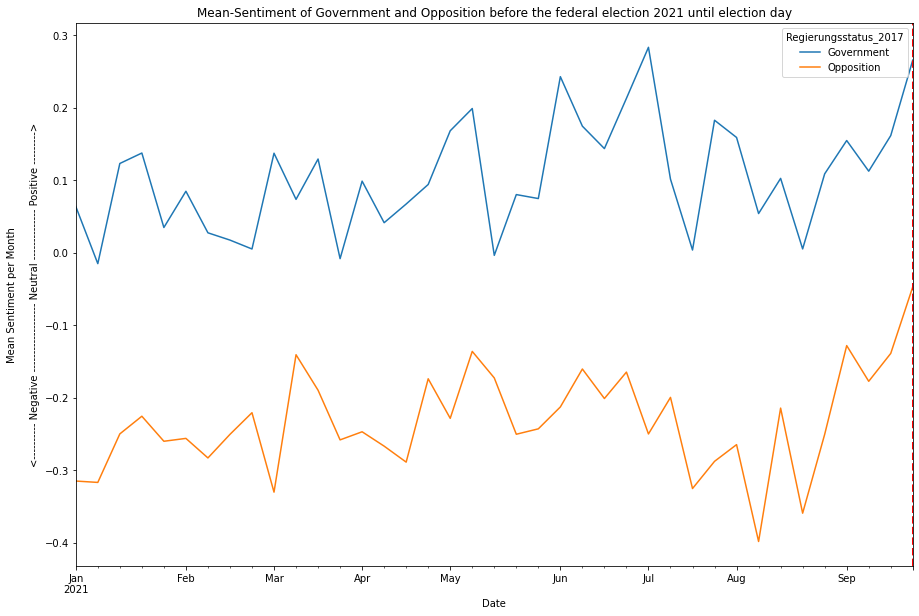

In [23]:
(old_df.pivot_table(index='Date', columns='Regierungsstatus_2017', values='Sentiment_adjusted')
   .resample('W').mean().plot(ylabel= r"Mean Sentiment per Month"
           "\n"                    
           "\n"  # Newline: the backslash is interpreted as usual
           r"<---------- Negative ------------------- Neutral -------------- Positive --------->", xlabel="Date",
                              title="Mean-Sentiment of Government and Opposition before the federal election 2021 until election day",
                              figsize=(15,10))).axvline(pd.to_datetime('2021-09-26'), color='r', linestyle='--', lw=2)

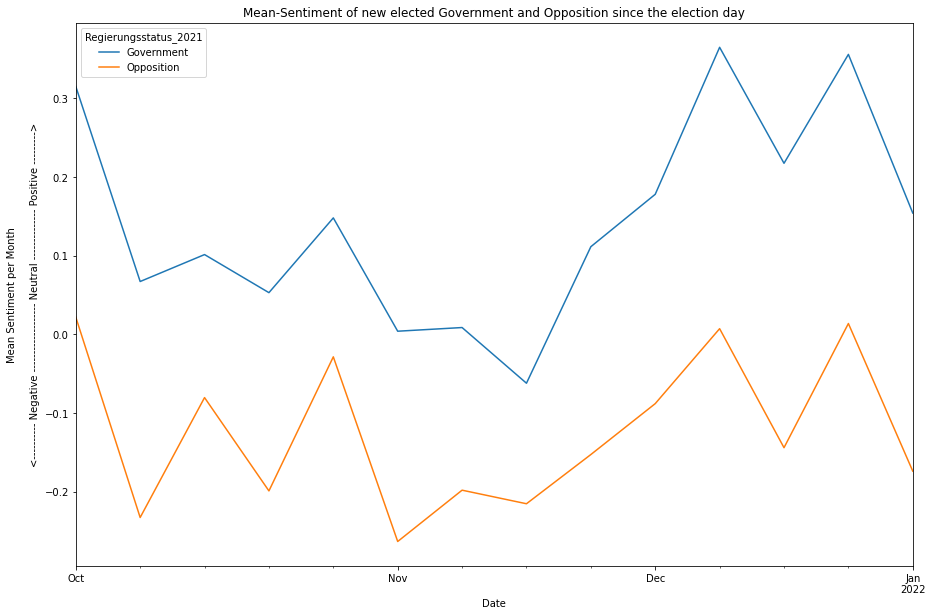

In [24]:
(new_df.pivot_table(index='Date', columns='Regierungsstatus_2021', values='Sentiment_adjusted')
   .resample('W').mean().plot(ylabel= r"Mean Sentiment per Month"
           "\n"                    
           "\n"  # Newline: the backslash is interpreted as usual
           r"<---------- Negative ------------------- Neutral -------------- Positive --------->", xlabel="Date",
                              title="Mean-Sentiment of new elected Government and Opposition since the election day",
                              figsize=(15,10))).axvline(pd.to_datetime('2021-09-26'), color='r', linestyle='--', lw=2)